In [7]:
# Importing Libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
parquet_file= r'C:\Users\verma\OneDrive\Desktop\PYTHON_DATA_PROJECT\1_Data_science_job_postings_dataset\0000.parquet'
df = pd.read_parquet(parquet_file, engine='auto')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill)

In [8]:
df_exploded = df.explode('job_skills').copy()

In [9]:
exploded_skill_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [10]:
skills_plot =exploded_skill_count.reset_index(name='total_count').sort_values(by= 'total_count', ascending=False)
skills_plot

,job_title_short,job_skills,total_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


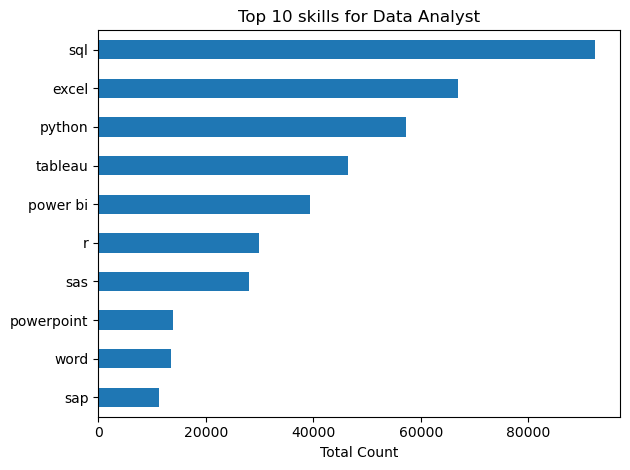

In [13]:
total_skills = 10
title = 'Data Analyst'
final_skill_plot = skills_plot[skills_plot['job_title_short'] == title].head(total_skills)
final_skill_plot.plot(kind='barh', x='job_skills', y='total_count')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.ylabel('')
plt.xlabel('Total Count')
plt.title(f'Top {total_skills} skills for {title}')
plt.tight_layout()